In [1]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


# Lab-3: Logistic Regression
_____
### Objectives:
1. Apply Logistic regression
2. Analyze results (Confusion Matrix, Precision, Recall)
-----


Dataset structure: int(age), int(salary), bool(purchased) 0 or 1 whether person buy a car or not

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
5   27            58000          0
6   27            84000          0
7   32           150000          1
8   25            33000          0
9   35            65000          0


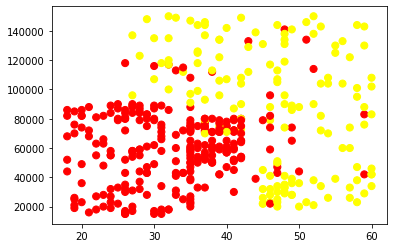

In [67]:
dataset = pd.read_csv('expensive_car_purchase.csv')
x = dataset.iloc[:, :2].values
y = dataset.iloc[:, 2].values
print(dataset.iloc[:10, :])
dataset = dataset.iloc[1:, :].values

plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plt.show()

Train test split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(dataset[:, :2], dataset[:, 2] , test_size=0.2, random_state=42, shuffle=False)

# x_train = np.expand_dims(x_train, axis=1)
# x_test = np.expand_dims(x_test, axis=1)
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

print(f"x_train (shape = {x_train.shape})")
print(f"x_test: (shape = {x_test.shape})")
print(f"y_train: (shape = {y_train.shape})")
print(f"y_test: (shape = {y_test.shape})")

x_train (shape = (319, 2))
x_test: (shape = (80, 2))
y_train: (shape = (319, 1))
y_test: (shape = (80, 1))


1 Fit Linear regression.
2 Calculate MSE metric for 'test' and print it
3 Make a scatter plot 'EstimatedSalary' (X) vs 'Purchased'(Y). 
  Plot both y_test and y_pred. 
4 Print first 10 values from y_test and y_pred

Mean squared error: 0.17772629352570504
EstimatedSalary:  [[0.95667528]
 [0.71906629]
 [0.31952809]
 [0.36967406]
 [0.83738839]
 [0.35657477]
 [0.41214479]
 [0.44775506]
 [0.51657438]
 [0.70453059]]
Purchased:  [[1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]]


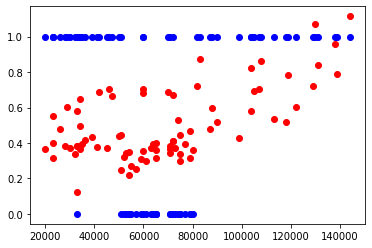

In [30]:
lin_regr = LinearRegression()
lin_regr.fit(x_train, y_train)
y_pred = lin_regr.predict(x_test)

mse_lin_regr = metrics.mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse_lin_regr)

xs = x_test[:, 1]

plt.scatter(xs, y_pred, color="red")  # EstimatedSalary
plt.scatter(xs, y_test, color="blue")  # Purchased

print("EstimatedSalary: ", y_pred[:10, :])
print("Purchased: ", y_test[:10, :])

1 Fit Logistic regression.
2 Calculate metrics for 'test' and print it (accuracy, recall, precision)
3 Apply scaling to data to x data and try again

x_train (shape = (319, 2))
x_test: (shape = (80, 2))
y_train: (shape = (319, 1))
y_test: (shape = (80, 1))
accuracy: 0.3625
recall: 0.0
precision: 0.0
Mean squared error: 0.6375


/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


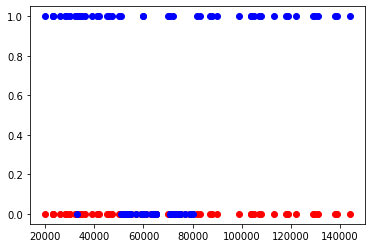

y_pred (shape = (80,))
EstimatedSalary:  [0 0 0 0 0 0 0 0 0 0]
Purchased:  [[1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]]
accuracy: 0.75
recall: 0.6274509803921569
precision: 0.9696969696969697
Mean squared error: 0.25
y_pred (shape = (80,))
EstimatedSalary:  [1 1 0 0 1 0 0 0 1 1]
Purchased:  [[1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]]


/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


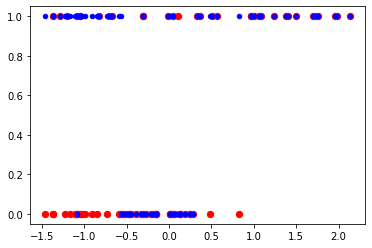

In [52]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(dataset[:, :2], dataset[:, 2] , test_size=0.2, random_state=42, shuffle=False)

# x_train = np.expand_dims(x_train, axis=1)
# x_test = np.expand_dims(x_test, axis=1)
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

print(f"x_train (shape = {x_train.shape})")
print(f"x_test: (shape = {x_test.shape})")
print(f"y_train: (shape = {y_train.shape})")
print(f"y_test: (shape = {y_test.shape})")

log_regr = LogisticRegression()
log_regr.fit(x_train, y_train)
y_pred = log_regr.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("accuracy:", accuracy)
print("recall:", recall)
print("precision:", precision)

mse_log_regr = metrics.mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse_log_regr)
xs = x_test[:, 1]

plt.scatter(xs, y_pred, color="red")  # EstimatedSalary
plt.scatter(xs, y_test, color="blue")  # Purchased
plt.show()

print(f"y_pred (shape = {y_pred.shape})")

print("EstimatedSalary: ", y_pred[:10])
print("Purchased: ", y_test[:10, :])

# ============================================================================

sc = StandardScaler().fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

log_regr = LogisticRegression()
log_regr.fit(x_train, y_train)
y_pred = log_regr.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("accuracy:", accuracy)
print("recall:", recall)
print("precision:", precision)

mse_log_regr = metrics.mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse_log_regr)
xs = x_test[:, 1]

plt.scatter(xs, y_pred, color="red", s=40)  # EstimatedSalary
plt.scatter(xs, y_test, color="blue", s=20)  # Purchased
plt.show()

print(f"y_pred (shape = {y_pred.shape})")

print("EstimatedSalary: ", y_pred[:10])
print("Purchased: ", y_test[:10, :])

Calculate and print confusion matrix

In [49]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
print("confusion:", confusion)

confusion: [[28  1]
 [19 32]]


Use new knowledge to apply LogReg for new dataset. 
Dataset structure: float(f1), float(f2), bool(class) 0 or 1.
Dataset is synthetic, so there is no description of feature meaning.

In [53]:
data = pd.read_csv('donut.csv').values
x = data[:, :2]
y = data[:, 2]


Make scatter plot for data. On this plot x[0] and x[1] are dataset features
and Y is used to color the points according to its class

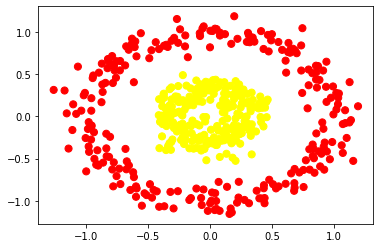

In [54]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plt.show()

Split data

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[:, :2], data[:, 2] , test_size=0.2, random_state=42, shuffle=False)

# x_train = np.expand_dims(x_train, axis=1)
# x_test = np.expand_dims(x_test, axis=1)
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

1 Fit Logistic regression.
2 Calculate metrics for 'test' and print it (accurcy, recall, precision)


accuracy: 0.4
recall: 0.2641509433962264
precision: 0.4
Mean squared error: 0.6


/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


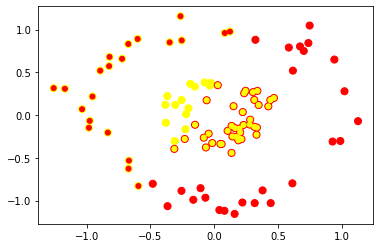

In [66]:
log_regr = LogisticRegression()
log_regr.fit(x_train, y_train)
y_pred = log_regr.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("accuracy:", accuracy)
print("recall:", recall)
print("precision:", precision)

mse_log_regr = metrics.mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse_log_regr)

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, s=50, cmap='autumn')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=25, cmap='autumn')
plt.show()

accuracy: 1.0
recall: 1.0
precision: 1.0
Mean squared error: 0.0


/home/ezio/.cache/pypoetry/virtualenvs/ml-ujqzsZ4e-py3.8/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


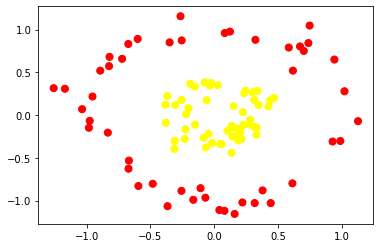

In [69]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("accuracy:", accuracy)
print("recall:", recall)
print("precision:", precision)

mse_log_regr = metrics.mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse_log_regr)

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, s=50, cmap='autumn')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=25, cmap='autumn')
plt.show()